
## CIFAR10

* classification (10 classes )
* 60,000 training images (50k training; 10k testing)
* RGB
* 32x32 = ??
* airplane (0); car (1), etc. 


In [1]:

import torch
import numpy as np
import os 

from torchvision import datasets
from torchvision import transforms


In [46]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [2]:

import torch.optim as optim
import torch.nn as nn


In [3]:

data_path = 'data/cifar10data/'

cifar10_training = datasets.CIFAR10(data_path, train=True, download=True)


Files already downloaded and verified


In [4]:

cifar10_test = datasets.CIFAR10(data_path, train=False, download=True)


Files already downloaded and verified


In [5]:

print(cifar10_training)


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/cifar10data/
    Split: Train


In [6]:

print(cifar10_test)


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data/cifar10data/
    Split: Test


In [7]:

img_train, label = cifar10_training[42]


In [8]:

label


2

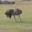

In [9]:

img_train


In [10]:

img_test, label = cifar10_test[2345]


In [11]:

label


1

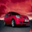

In [12]:

img_test


In [13]:

print(  dir(transforms)  )


['AugMix', 'AutoAugment', 'AutoAugmentPolicy', 'CenterCrop', 'ColorJitter', 'Compose', 'ConvertImageDtype', 'ElasticTransform', 'FiveCrop', 'GaussianBlur', 'Grayscale', 'InterpolationMode', 'Lambda', 'LinearTransformation', 'Normalize', 'PILToTensor', 'Pad', 'RandAugment', 'RandomAdjustSharpness', 'RandomAffine', 'RandomApply', 'RandomAutocontrast', 'RandomChoice', 'RandomCrop', 'RandomEqualize', 'RandomErasing', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomInvert', 'RandomOrder', 'RandomPerspective', 'RandomPosterize', 'RandomResizedCrop', 'RandomRotation', 'RandomSolarize', 'RandomVerticalFlip', 'Resize', 'TenCrop', 'ToPILImage', 'ToTensor', 'TrivialAugmentWide', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_pil_constants', '_presets', 'autoaugment', 'functional', 'functional_pil', 'functional_tensor', 'transforms']


In [14]:

print(img_train)


<PIL.Image.Image image mode=RGB size=32x32 at 0x186C2078908>


In [15]:

to_tensor = transforms.ToTensor()

img_train_tr = to_tensor( img_train )

print(  img_train_tr.shape  )


torch.Size([3, 32, 32])


In [16]:

tensor_cifar10_training = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor() )


In [17]:

img_tr, label = tensor_cifar10_training[23456]


In [18]:

print(img_tr)


tensor([[[0.7412, 0.6314, 0.6627,  ..., 0.5922, 0.8471, 0.9922],
         [0.4588, 0.2392, 0.3020,  ..., 0.1647, 0.6431, 0.9608],
         [0.4392, 0.2000, 0.2667,  ..., 0.1451, 0.5137, 0.8824],
         ...,
         [0.8392, 0.7725, 0.7882,  ..., 0.7255, 0.6196, 0.8118],
         [0.8863, 0.7294, 0.6627,  ..., 0.6275, 0.6196, 0.8353],
         [0.9412, 0.7608, 0.6627,  ..., 0.6588, 0.7216, 0.8902]],

        [[0.7725, 0.6863, 0.7137,  ..., 0.5961, 0.8353, 0.9804],
         [0.5137, 0.3412, 0.4235,  ..., 0.1843, 0.6353, 0.9490],
         [0.5020, 0.3333, 0.4275,  ..., 0.1804, 0.5137, 0.8745],
         ...,
         [0.8235, 0.7490, 0.7725,  ..., 0.7255, 0.6196, 0.8196],
         [0.8706, 0.6980, 0.6431,  ..., 0.6157, 0.6157, 0.8392],
         [0.9333, 0.7451, 0.6549,  ..., 0.6549, 0.7176, 0.8902]],

        [[0.7686, 0.6745, 0.6784,  ..., 0.5882, 0.8353, 0.9843],
         [0.5020, 0.3020, 0.3373,  ..., 0.1843, 0.6431, 0.9569],
         [0.4941, 0.2784, 0.3216,  ..., 0.1882, 0.5333, 0.


## Normalize


In [19]:

imgs_list = [img_t for img_t, label in tensor_cifar10_training]


In [20]:

len(imgs_list)


50000

In [21]:

all_imgs_tr = torch.stack(  imgs_list, dim=3   )

print( all_imgs_tr.shape)


torch.Size([3, 32, 32, 50000])


In [22]:

view1 = all_imgs_tr.view(3, -1)
print(  view1.shape  )


torch.Size([3, 51200000])


In [23]:

view1_mean = view1.mean(dim=1)
print(view1_mean)


tensor([0.4914, 0.4822, 0.4465])


In [24]:

view1_std = view1.std(dim=1)
print(view1_std)


tensor([0.2470, 0.2435, 0.2616])


In [25]:

## pixel = ( pixel - mean) / standard_dev

transformed_cifar10_train = datasets.CIFAR10(data_path, train=True, download=False,
                                               transform=transforms.Compose([
                                                     transforms.ToTensor(),
                                                     transforms.Normalize(view1_mean, view1_std)
                                            ]))


transformed_cifar10_test = datasets.CIFAR10(data_path, train=False, download=False,
                                               transform=transforms.Compose([
                                                     transforms.ToTensor(),
                                                     transforms.Normalize(view1_mean, view1_std)
                                            ]))


In [26]:

transformed_cifar10_test.data.shape


(10000, 32, 32, 3)

In [27]:

## 32 x 32 x 3 = 3072 


## Build dataset

In [28]:

label_map = {0:0, 2:1 }


In [29]:

cifar10_final_train = [  (img, label_map[label])  for img, label in transformed_cifar10_train if label in [0, 2]]




In [31]:

cifar10_final_test = [  (img, label_map[label])  for img, label in transformed_cifar10_test if label in [0, 2]]



## Dataloader


In [32]:

batch_size = 32


In [33]:

train_DataLoader = torch.utils.data.DataLoader(cifar10_final_train, batch_size=batch_size, shuffle=True)



## Architectures


In [39]:

## you need to convert these to object oriented format

model_mlp = nn.Sequential(
      nn.Linear( 3072, 512),
      nn.ReLU(),     ## Tanh(). sigmoid(), etc. 
      nn.Linear(512, 2),
      nn.Softmax(dim=1)

)

## img ,  3     ->> [    ]     one_hot_encoding  


In [ ]:

## Deep Learning

model_3DL = = nn.Sequential(
      nn.Linear( 3072, 1024),
      nn.ReLU(),    
      nn.Linear(1024, 512),
      nn.ReLU(), 
      nn.Linear(512, 128),
      nn.ReLU(), 
      nn.Linear(128, 2),
      nn.LogSoftmax(dim=1)

)


In [ ]:

loss_fn = nn.CrossEntropyLoss( )


In [ ]:

model_fn = model_3DL



## Training process 


In [ ]:

learning_rate = 0.001

n_epochs = 100

optimizer = optim.Adam(  model_fn.parameters() , lr=learning_rate  )



In [44]:


for epoch in range(n_epochs):
    for imgs, labels in train_DataLoader:
        ##print(labels)
        ## resize img
        imgs_resized = imgs.view(imgs.shape[0], -1 )
        preds = model_fn(imgs_resized)
        loss = loss_fn(  preds, labels  )
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(loss)
      
    


tensor(0.5633, grad_fn=<NllLossBackward0>)
tensor(0.5628, grad_fn=<NllLossBackward0>)
tensor(0.5008, grad_fn=<NllLossBackward0>)
tensor(0.4383, grad_fn=<NllLossBackward0>)
tensor(0.3758, grad_fn=<NllLossBackward0>)
tensor(0.4383, grad_fn=<NllLossBackward0>)
tensor(0.5633, grad_fn=<NllLossBackward0>)
tensor(0.5008, grad_fn=<NllLossBackward0>)
tensor(0.6258, grad_fn=<NllLossBackward0>)
tensor(0.4383, grad_fn=<NllLossBackward0>)
tensor(0.4383, grad_fn=<NllLossBackward0>)
tensor(0.3758, grad_fn=<NllLossBackward0>)
tensor(0.6258, grad_fn=<NllLossBackward0>)
tensor(0.6258, grad_fn=<NllLossBackward0>)
tensor(0.5008, grad_fn=<NllLossBackward0>)
tensor(0.3758, grad_fn=<NllLossBackward0>)
tensor(0.6258, grad_fn=<NllLossBackward0>)
tensor(0.5008, grad_fn=<NllLossBackward0>)
tensor(0.5633, grad_fn=<NllLossBackward0>)
tensor(0.4383, grad_fn=<NllLossBackward0>)
tensor(0.5008, grad_fn=<NllLossBackward0>)
tensor(0.7508, grad_fn=<NllLossBackward0>)
tensor(0.6883, grad_fn=<NllLossBackward0>)
tensor(0.43


## Test model on the test set


In [47]:

len( cifar10_final_test)


2000

In [48]:

test_DataLoader = torch.utils.data.DataLoader(  cifar10_final_test, batch_size=2000, shuffle=False  )


In [53]:

with torch.no_grad():
    for imgs, labels in test_DataLoader:
        batch_size = imgs.shape[0]
        outputs = model_fn(  imgs.view(batch_size, -1)   )
        vals, indeces = torch.max( outputs, dim=1  )
        preds = indeces
        metric = (preds == labels).sum()

        total = imgs.shape[0]

result = metric / total



In [54]:
result

tensor(0.7435)

In [51]:

def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))


In [52]:



with torch.no_grad():
    for imgs, labels in test_DataLoader:
        batch_size = imgs.shape[0]
        outputs = model_fn(  imgs.view(batch_size, -1)   )
        vals, indeces = torch.max( outputs, dim=1  )
        preds = indeces
        print_metrics_function(labels, preds)
   



Accuracy: 0.74
Confusion Matrix:
[[712 288]
 [225 775]]
Precision: 0.744
Recall: 0.744
F1-measure: 0.743


In [ ]:

## 2   -> [0, 0, 1, 0, 0 , 0, 0, 0, 0 , 0]

## 7   -> [0, 0, 0, 0, 0 , 0, 0, 1, 0 , 0]

## 4   -> [0, 0, 0, 0, 1, 0, 0, 0, 0 , 0]  <>  [0 ,1 ,0, , , , , , , , ]   


In [ ]:


def my_softmax(x):
    return torch.exp(x) / torch.exp(x).sum()


In [ ]:

x = torch.tensor(  [0.4, 0.7, 0.5]  )

print(   my_softmax(x).sum()  )

                  